In [9]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import sklearn
import random as rn
from keras.layers import Dense
from keras import Input
#from tensorflow.python.keras.engine import Model
from keras.utils import to_categorical
#from tensorflow.keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, C

In [10]:
DATA_DIR = 'Data/'

In [14]:
wav, sr = librosa.load(DATA_DIR + '/긍1.wav', sr=None)
print('sr : ', sr)
print('wav shape : ', wav.shape)
print('length : ', wav.shape[0]/float(sr), 'secs')

sr :  48000
wav shape :  (195418,)
length :  4.071208333333334 secs


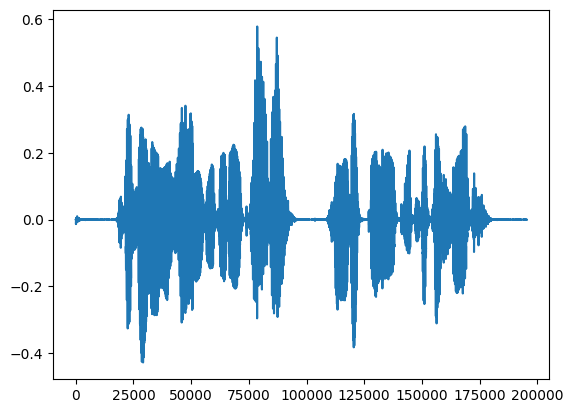

In [17]:
print(plt.plot(wav))

In [18]:
#데이터셋 리스트, raw data, mfcc data, y data를 포함한다.
trainset = []
testset = []

#STFT 한 것, CNN 분석하기 위해 Spectogram으로 만든것, MF 한 것, mel0spectogram 한 것
train_X = []
train_mfccs = []
train_y = []

test_X = []
test_mfccs = []
test_y = []

#모든 음성파일의 길이가 같도록 뒤에 padding 처리 한다.
pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros(i-a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

frame_length = 0.025
frame_stride = 0.0010

In [21]:
filename = os.listdir(DATA_DIR)

In [25]:
wav, sr = librosa.load(DATA_DIR + '/긍1.wav', sr=None)

In [31]:
mfcc = librosa.feature.mfcc(y = wav, sr=48000, n_mfcc=100, n_fft=400, hop_length=160)

In [41]:
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

C:\Users\kwarkmc\.conda\envs\capstone\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\kwarkmc\.conda\envs\capstone\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
